STOCK MARKET ANALYSIS FOR MICROSOFT STOCK DATASET 

https://github.com/HemanthAddepalli/Microsoft-stock-analysis


In [ ]:
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [ ]:
import pandas as pd 

# Load and Explore Time Series

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
missing = ['--', 'NA', 'na', '-',' ']
df=pd.read_csv("/content/drive/MyDrive/Dataset/stock_train.csv",encoding='latin1', on_bad_lines='skip', parse_dates=True)
serie =pd.read_csv('/content/drive/MyDrive/Dataset/stock_train.csv', header=0, index_col=0, usecols =["date","num_sold"],parse_dates=True,squeeze=True)
train=df
print("Shape of dataframe is: {}".format(serie.shape))

Shape of dataframe is: (70128,)


In [ ]:
serie.head()

date
2017-01-01    663
2017-01-01    615
2017-01-01    480
2017-01-01    710
2017-01-01    240
Name: num_sold, dtype: int64

In [ ]:
type(serie)

pandas.core.series.Series

In [ ]:
#Descriptive Statistics
serie.describe()


count    70128.000000
mean       194.296986
std        126.893874
min         19.000000
25%         95.000000
50%        148.000000
75%        283.000000
max        986.000000
Name: num_sold, dtype: float64

In [ ]:
df.isnull().sum()
#no null values

row_id      0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [ ]:
#Sampling
df=df.iloc[:5000]
df.shape

(5000, 6)

In [ ]:
series=df.squeeze()
type(series)

pandas.core.frame.DataFrame

# Feature Engineering

In [ ]:
dataframe = pd.DataFrame()
dataframe['month'] = [serie.index[i].month for i in range(len(serie))]
dataframe['day'] = [serie.index[i].day for i in range(len(serie))]
dataframe['num_sold'] = [serie[i] for i in range(len(serie))]
print(dataframe.head(5))

   month  day  num_sold
0      1    1       663
1      1    1       615
2      1    1       480
3      1    1       710
4      1    1       240


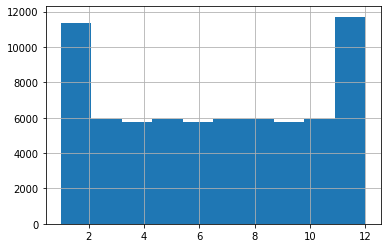

In [ ]:
dataframe["month"].hist()

In [ ]:
# create a lag feature meantemp
temps = pd.DataFrame(serie.values)
dataframe = pd.concat([temps.shift(1), temps], axis=1)
dataframe.columns = ['t', 't+1']
print(dataframe.head(5))


       t  t+1
0    NaN  663
1  663.0  615
2  615.0  480
3  480.0  710
4  710.0  240


In [ ]:
# create a lag feature meantemp
temps = pd.DataFrame(serie.values)
dataframe = pd.concat([temps.shift(3), temps.shift(2), temps.shift(1), temps], axis=1)
dataframe.columns = ['t-2', 't-1', 't', 't+1']
print(dataframe.head(5))


     t-2    t-1      t  t+1
0    NaN    NaN    NaN  663
1    NaN    NaN  663.0  615
2    NaN  663.0  615.0  480
3  663.0  615.0  480.0  710
4  615.0  480.0  710.0  240


In [ ]:
#create rolling statistics features
temps = pd.DataFrame(serie.values)
width = 3
shifted = temps.shift(width - 1)
window = shifted.rolling(window=width)
dataframe = pd.concat([window.min(), window.mean(), window.max(), temps], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head(5))

     min   mean    max  t+1
0    NaN    NaN    NaN  663
1    NaN    NaN    NaN  615
2    NaN    NaN    NaN  480
3    NaN    NaN    NaN  710
4  480.0  586.0  663.0  240


In [ ]:
# create expanding window features
temps = pd.DataFrame(serie.values)
window = temps.expanding()
dataframe = pd.concat([window.min(), window.mean(), window.max(), temps.shift(-1)], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head(5))


     min   mean    max    t+1
0  663.0  663.0  663.0  615.0
1  615.0  639.0  663.0  480.0
2  480.0  586.0  663.0  710.0
3  480.0  617.0  710.0  240.0
4  240.0  541.6  710.0  187.0


# Data Visualization


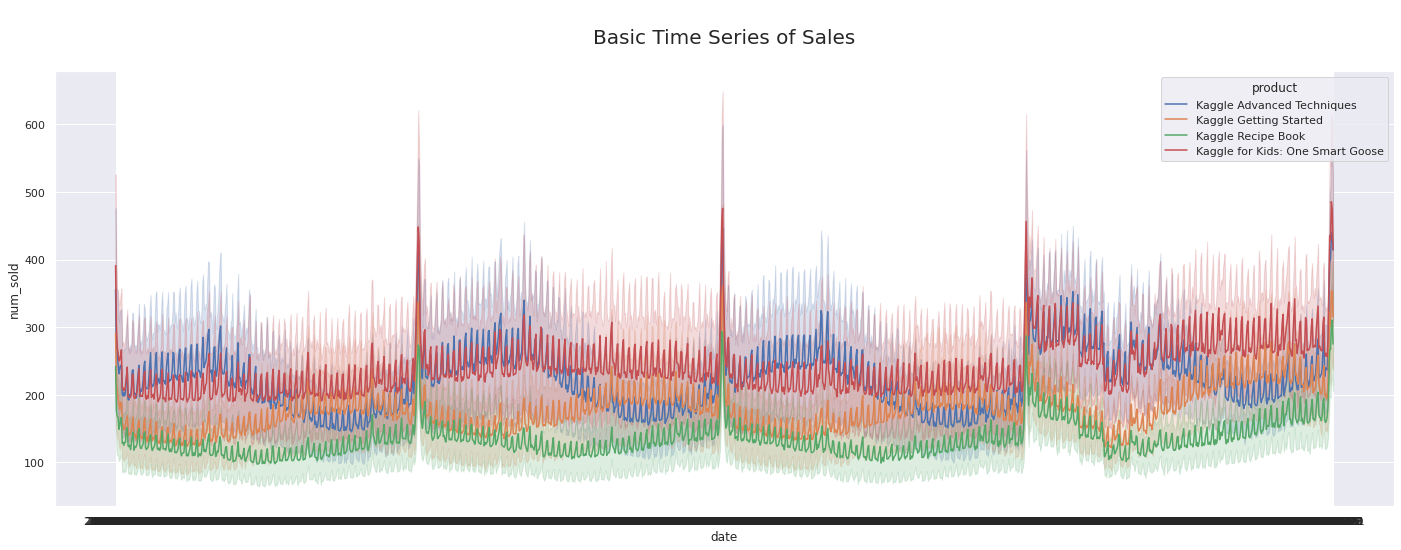

In [ ]:
#line plot
sns.set(rc={'figure.figsize':(24,8)})
ax=sns.lineplot(data=train,x='date',y='num_sold',hue='product')
ax.axes.set_title("\nBasic Time Series of Sales\n",fontsize=20);

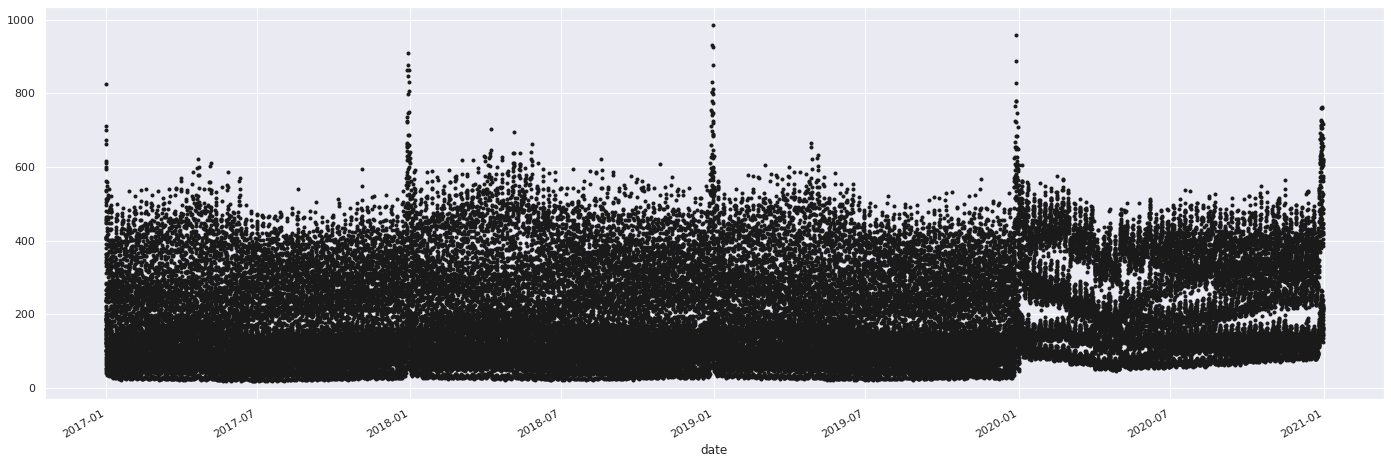

In [ ]:
#dot plot
serie.plot(style='k.')
mpl.pyplot.show()

In [ ]:
#His
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot


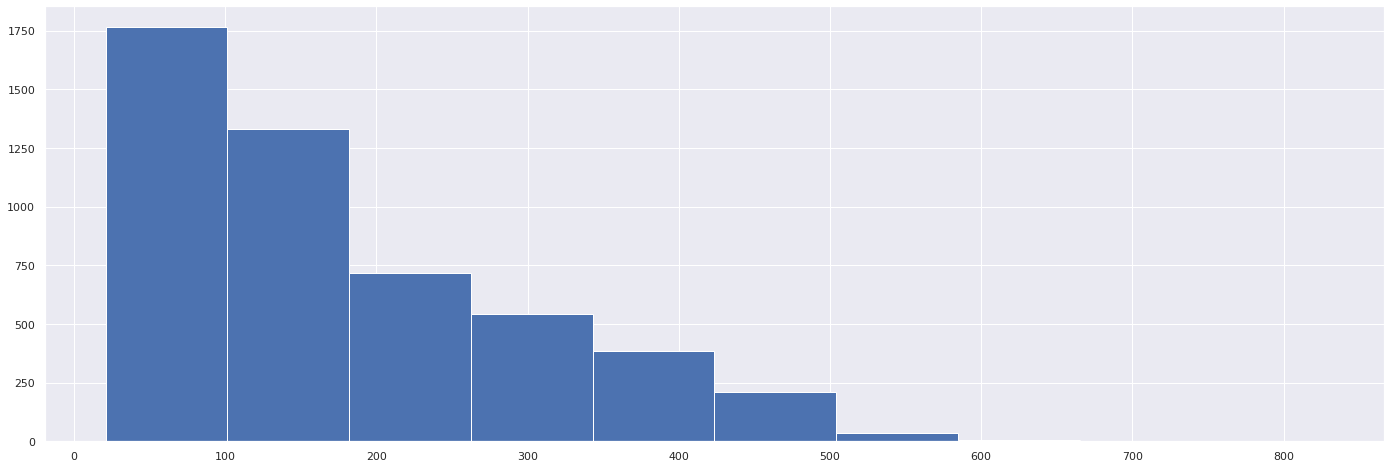

In [ ]:
series=df["num_sold"].squeeze()
series.hist()
pyplot.show()

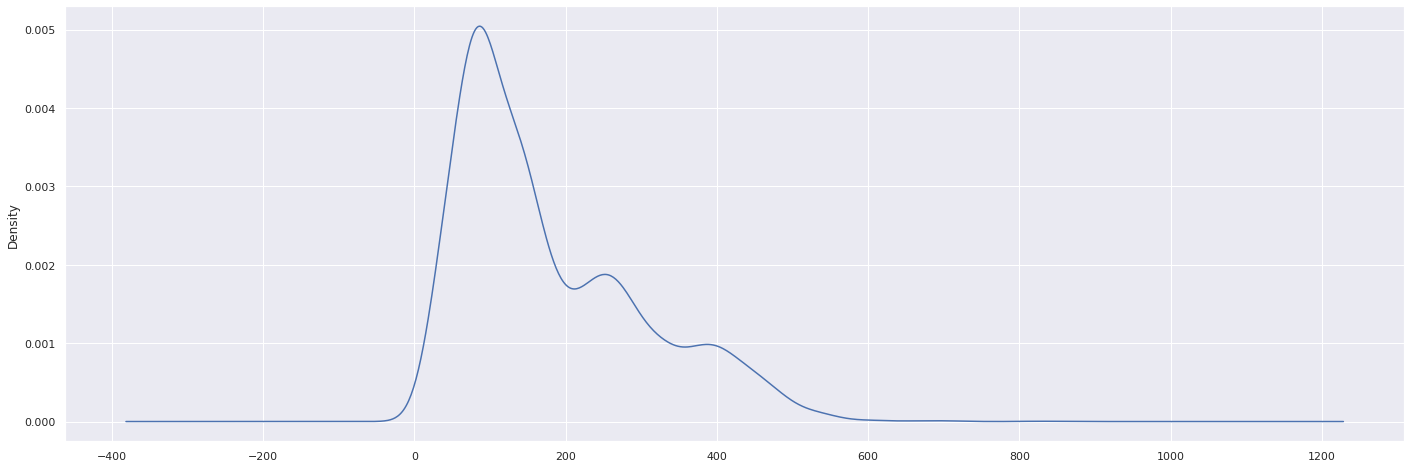

In [ ]:
series.plot(kind='kde')
pyplot.show()

In [ ]:
series

0       663
1       615
2       480
3       710
4       240
       ... 
4995    471
4996    186
4997     96
4998     89
4999    147
Name: num_sold, Length: 5000, dtype: int64

In [ ]:
df.dtypes

row_id       int64
date        object
country     object
store       object
product     object
num_sold     int64
dtype: object

In [ ]:
df['date']=pd.to_datetime(df["date"])
df["month"]=df["date"].dt.strftime('%b')
df["year"]=df["date"].dt.strftime('%Y')
df["days"]=df["date"].dt.strftime('%A')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

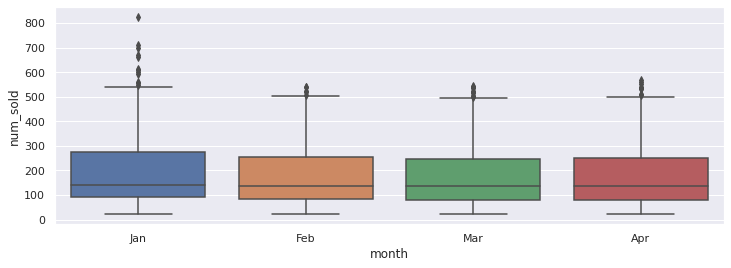

,row_id,date,country,store,product,num_sold,month,year,days
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663,Jan,2017,Sunday
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615,Jan,2017,Sunday
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480,Jan,2017,Sunday
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,Jan,2017,Sunday
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240,Jan,2017,Sunday


In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.boxplot(x='month',y='num_sold',data=df,ax=ax)
plt.show()
df.head()

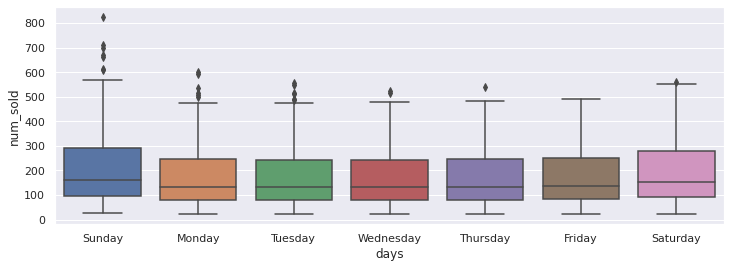

,row_id,date,country,store,product,num_sold,month,year,days
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663,Jan,2017,Sunday
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615,Jan,2017,Sunday
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480,Jan,2017,Sunday
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,Jan,2017,Sunday
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240,Jan,2017,Sunday


In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.boxplot(x='days',y='num_sold',data=df,ax=ax)
plt.show()
df.head()

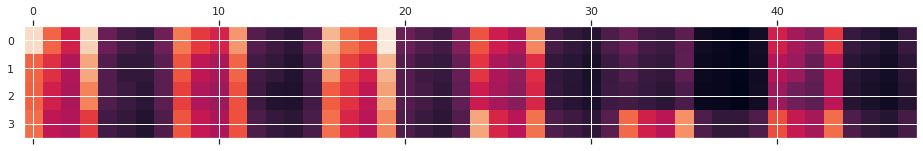

In [ ]:
#heat map
groups = serie.groupby(pd.Grouper(freq='d'))
years = pd.DataFrame()
for name, group in groups:
  years[name.year] = group.values
years = years.T
mpl.pyplot.matshow(years, interpolation=None, aspect='auto')
mpl.pyplot.show()


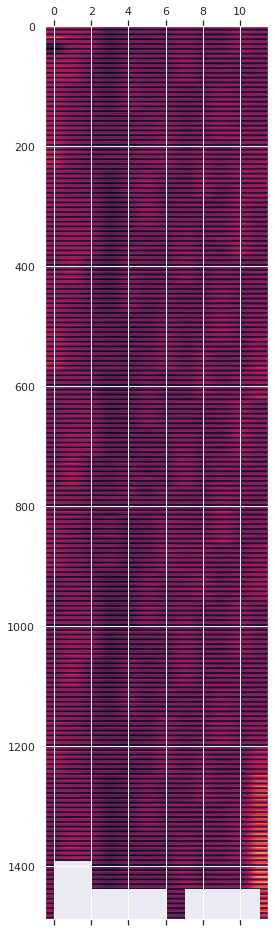

In [ ]:
#heat map monthly data
one_year = serie['2020']
groups = one_year.groupby(pd.Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
months.columns = range(1,13)
mpl.pyplot.matshow(months, interpolation=None, aspect='auto')
mpl.pyplot.show()


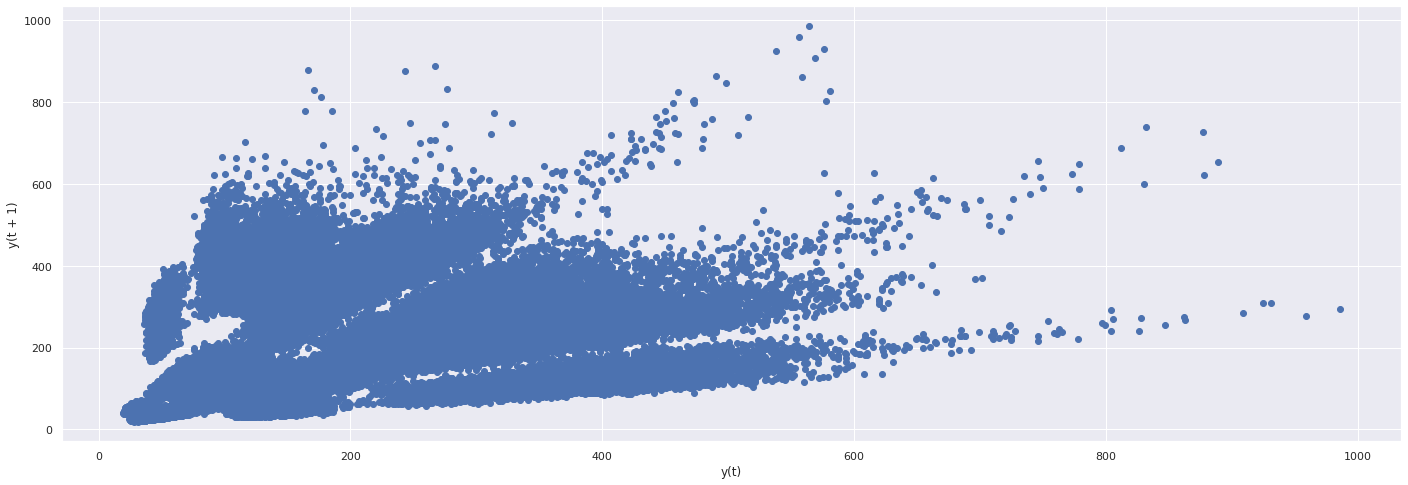

In [ ]:
#scatter plot
pd.plotting.lag_plot(serie)
mpl.pyplot.show()


In [ ]:
df.sort_values

<bound method DataFrame.sort_values of       row_id       date  country       store  \
0          0 2017-01-01  Belgium  KaggleMart   
1          1 2017-01-01  Belgium  KaggleMart   
2          2 2017-01-01  Belgium  KaggleMart   
3          3 2017-01-01  Belgium  KaggleMart   
4          4 2017-01-01  Belgium  KaggleRama   
...      ...        ...      ...         ...   
4995    4995 2017-04-15  Belgium  KaggleMart   
4996    4996 2017-04-15  Belgium  KaggleRama   
4997    4997 2017-04-15  Belgium  KaggleRama   
4998    4998 2017-04-15  Belgium  KaggleRama   
4999    4999 2017-04-15  Belgium  KaggleRama   

                               product  num_sold month  year      days  
0           Kaggle Advanced Techniques       663   Jan  2017    Sunday  
1               Kaggle Getting Started       615   Jan  2017    Sunday  
2                   Kaggle Recipe Book       480   Jan  2017    Sunday  
3     Kaggle for Kids: One Smart Goose       710   Jan  2017    Sunday  
4           Kaggle 

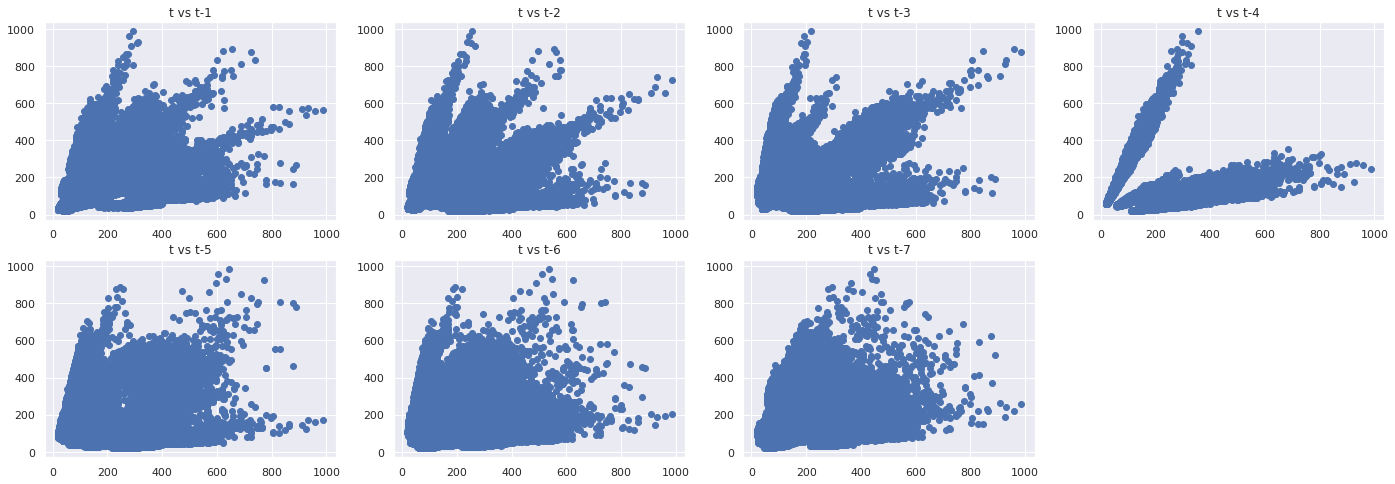

In [ ]:
#multiple scatter plot
values = pd.DataFrame(serie.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
  columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t']
for i in range(1,(lags + 1)):
  columns.append('t-' + str(i))
dataframe.columns = columns
mpl.pyplot.figure(1)
for i in range(1,(lags + 1)):
  ax = mpl.pyplot.subplot(240 + i)
  ax.set_title('t vs t-' + str(i))
  mpl.pyplot.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
mpl.pyplot.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


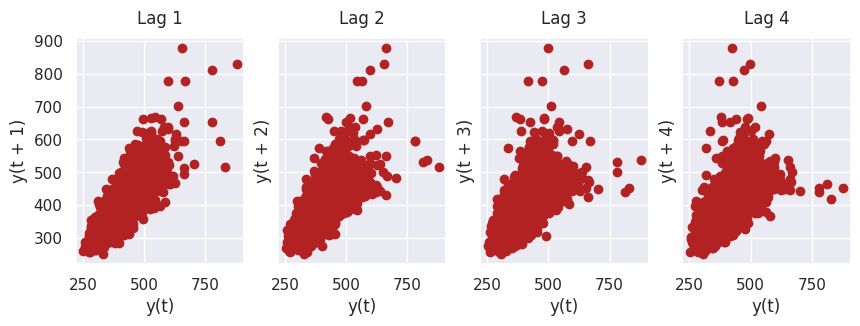

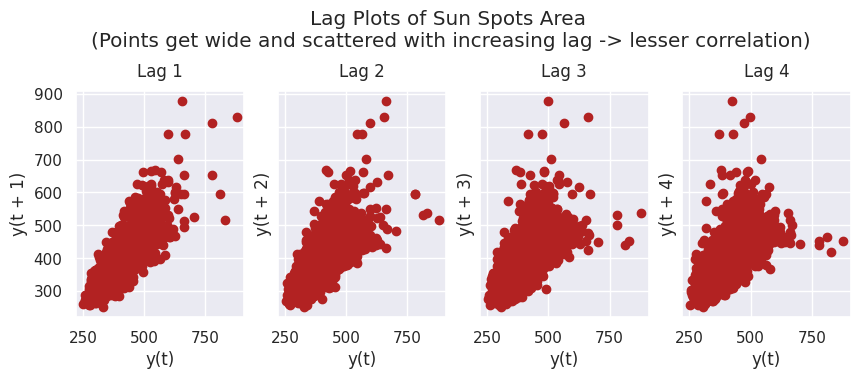

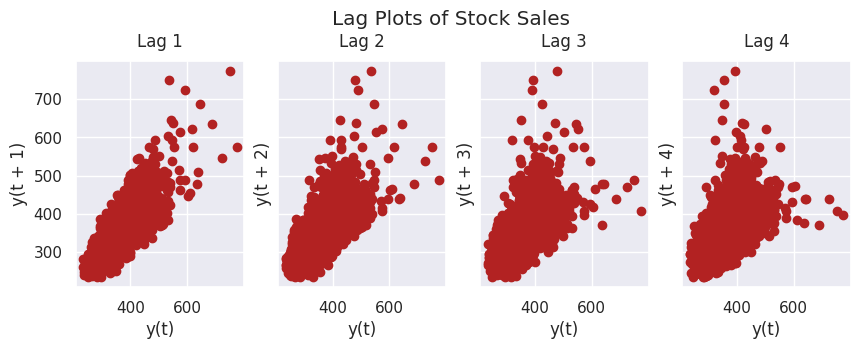

In [ ]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})


ss = train[(train['country']=='Belgium')&(train['product']=='Kaggle Advanced Techniques')&(train['store']=='KaggleMart')]
ss['value']=ss['num_sold']
a10 = train[(train['country']=='France')&(train['product']=='Kaggle Advanced Techniques')&(train['store']=='KaggleMart')]
a10['value']=a10['num_sold']


fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(ss.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))


fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(ss.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Sun Spots Area \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.15)    

fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(a10.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Stock Sales', y=1.05)   
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


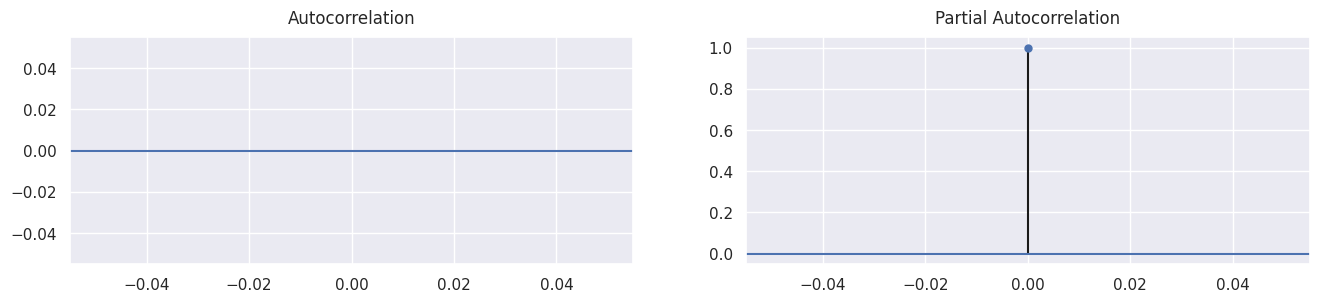

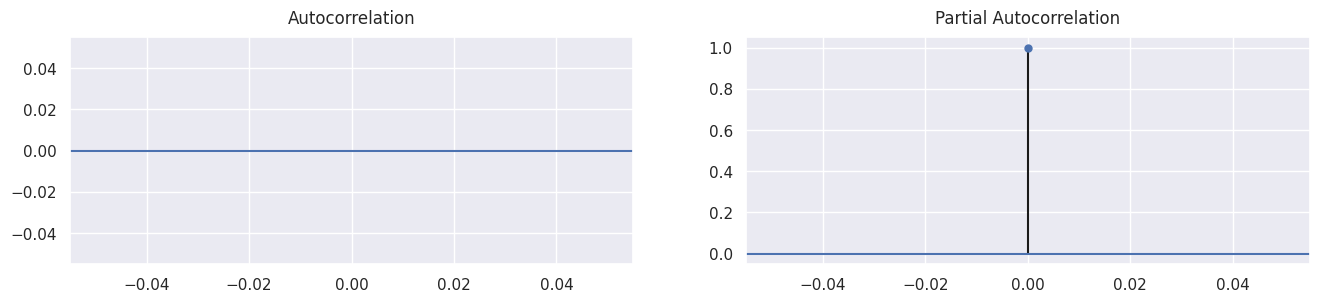

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df1 = train[(train['country']=='Belgium')&(train['product']=='Kaggle Advanced Techniques')&(train['store']=='KaggleMart')]
df1['value']=df['num_sold']
acf_50 = acf(df1.value, nlags=50)
pacf_50 = pacf(df1.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df1.value.tolist(), lags=50, ax=axes[0])
plot_pacf(df1.value.tolist(), lags=100, ax=axes[1])

# Sampling and Resampling

In [ ]:
# upsample to daily intervals
def parser(x):
  return pd.datetime.strptime('190'+x, '%Y-%m')
upsampled = serie.resample('D').mean()
print(upsampled.head(10))


date
2017-01-01    319.833333
2017-01-02    241.208333
2017-01-03    226.750000
2017-01-04    217.604167
2017-01-05    204.062500
2017-01-06    205.895833
2017-01-07    213.979167
2017-01-08    215.937500
2017-01-09    174.541667
2017-01-10    173.208333
Freq: D, Name: num_sold, dtype: float64


date
2017-01-01    319.833333
2017-01-02    241.208333
2017-01-03    226.750000
2017-01-04    217.604167
2017-01-05    204.062500
2017-01-06    205.895833
2017-01-07    213.979167
2017-01-08    215.937500
2017-01-09    174.541667
2017-01-10    173.208333
Freq: D, Name: num_sold, dtype: float64


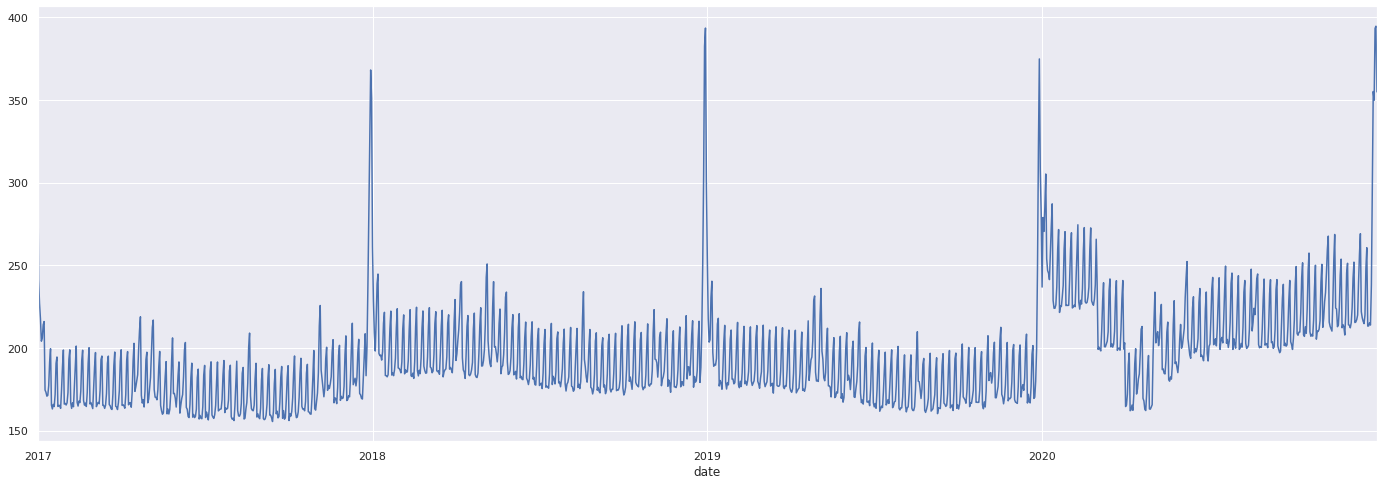

In [ ]:
# upsample to daily intervals with linear interpolation
from matplotlib import pyplot
def parser(x):
  return pd.datetime.strptime('190'+x, '%Y-%m')

upsampled = serie.resample('D').mean()
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(10))
interpolated.plot()
pyplot.show()


date
2017-01-01    319.833333
2017-01-02    241.208333
2017-01-03    226.750000
2017-01-04    217.604167
2017-01-05    204.062500
2017-01-06    205.895833
2017-01-07    213.979167
2017-01-08    215.937500
2017-01-09    174.541667
2017-01-10    173.208333
Freq: D, Name: num_sold, dtype: float64


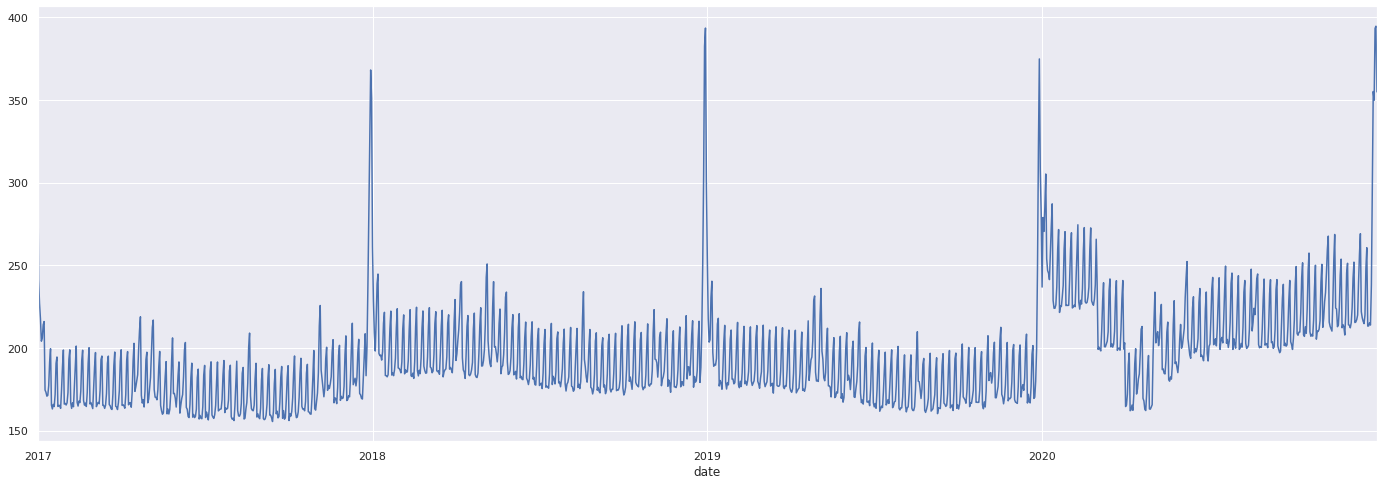

In [ ]:
# upsample to daily intervals with spline interpolation
from matplotlib import pyplot
def parser(x):
  return pd.datetime.strptime('190'+x, '%Y-%m')

upsampled = serie.resample('D').mean()
interpolated = upsampled.interpolate(method='spline', order=2)
print(interpolated.head(10))
interpolated.plot()
pyplot.show()

date
2017-03-31    179.698148
2017-06-30    175.991987
2017-09-30    168.855072
2017-12-31    186.021286
2018-03-31    198.579630
Freq: Q-DEC, Name: num_sold, dtype: float64


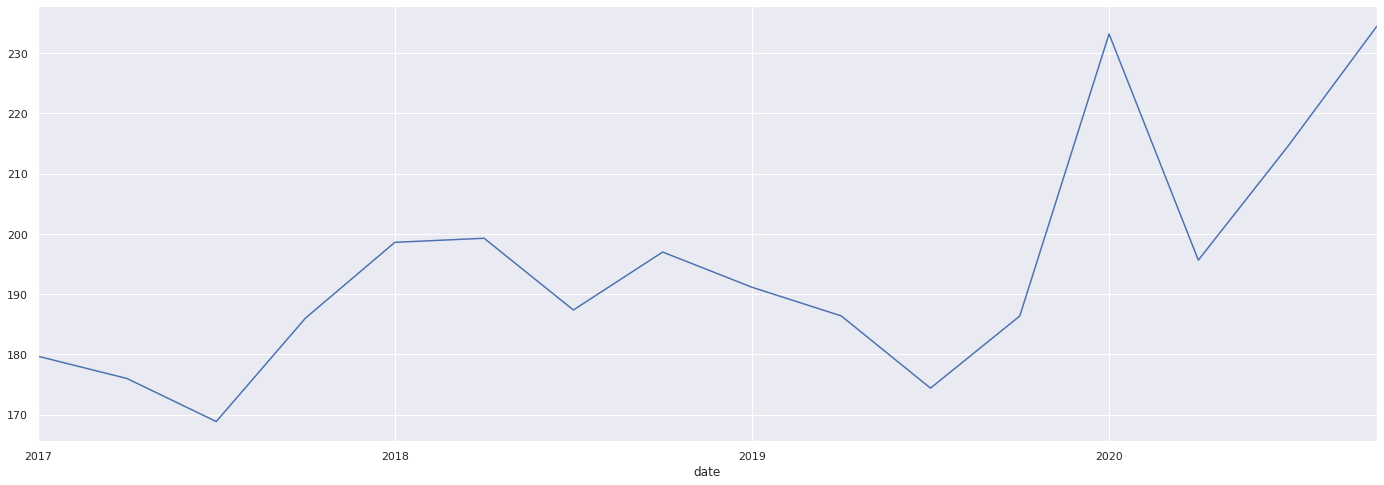

In [ ]:
# downsample to quarterly intervals
from matplotlib import pyplot
def parser(x):
  return pd.datetime.strptime('190'+x, '%Y-%m')

resample = serie.resample('Q')
quarterly_mean_sales = resample.mean()
print(quarterly_mean_sales.head())
quarterly_mean_sales.plot()
pyplot.show()


date
2017-12-31    3112163
2018-12-31    3425424
2019-12-31    3232879
2020-12-31    3855193
Freq: A-DEC, Name: num_sold, dtype: int64


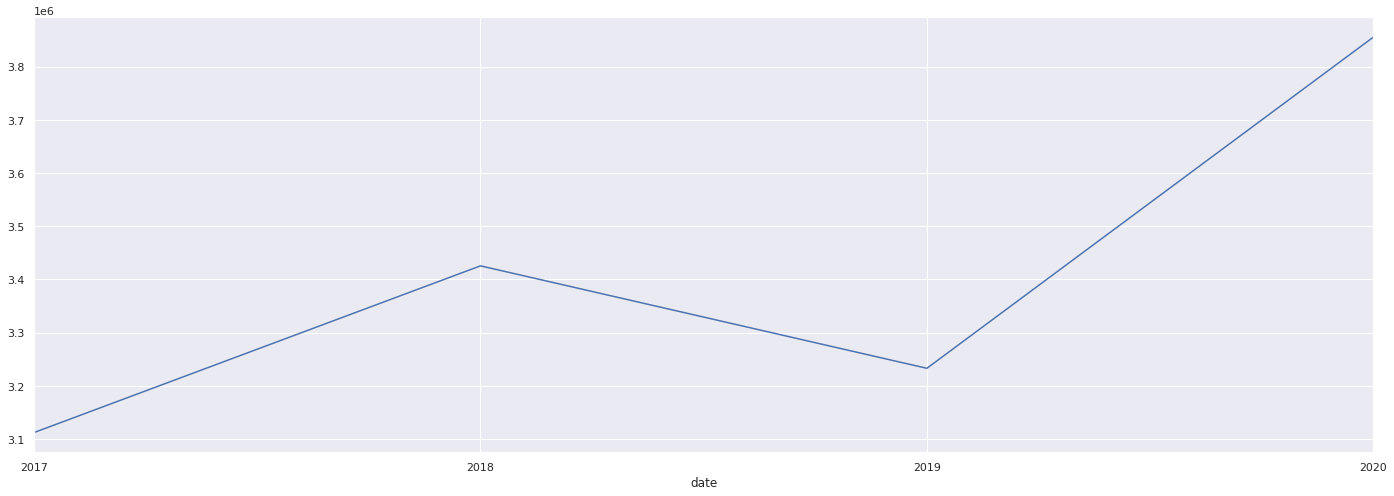

In [ ]:
# downsample to yearly intervals
from matplotlib import pyplot
def parser(x):
  return pd.datetime.strptime('190'+x, '%Y-%m')

resample = serie.resample('A')
yearly_mean_sales = resample.sum()
print(yearly_mean_sales.head())
yearly_mean_sales.plot()
pyplot.show()


# Power Transform

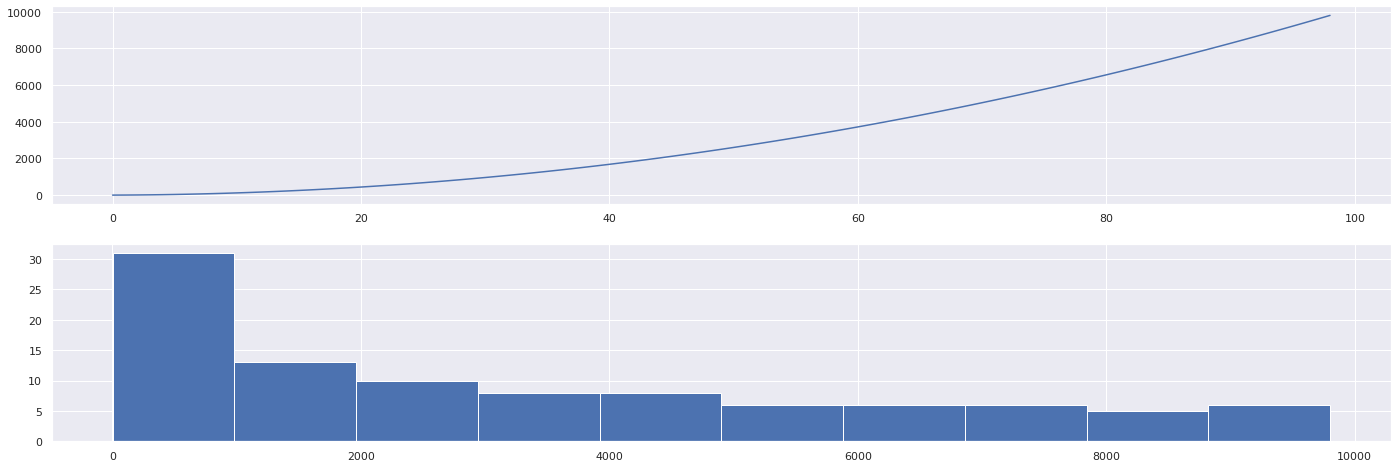

In [ ]:
# contrive a quadratic time series
from matplotlib import pyplot
series = [i**2 for i in range(1,100)]
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(series)
# histogram
pyplot.subplot(212)
pyplot.hist(series)
pyplot.show()

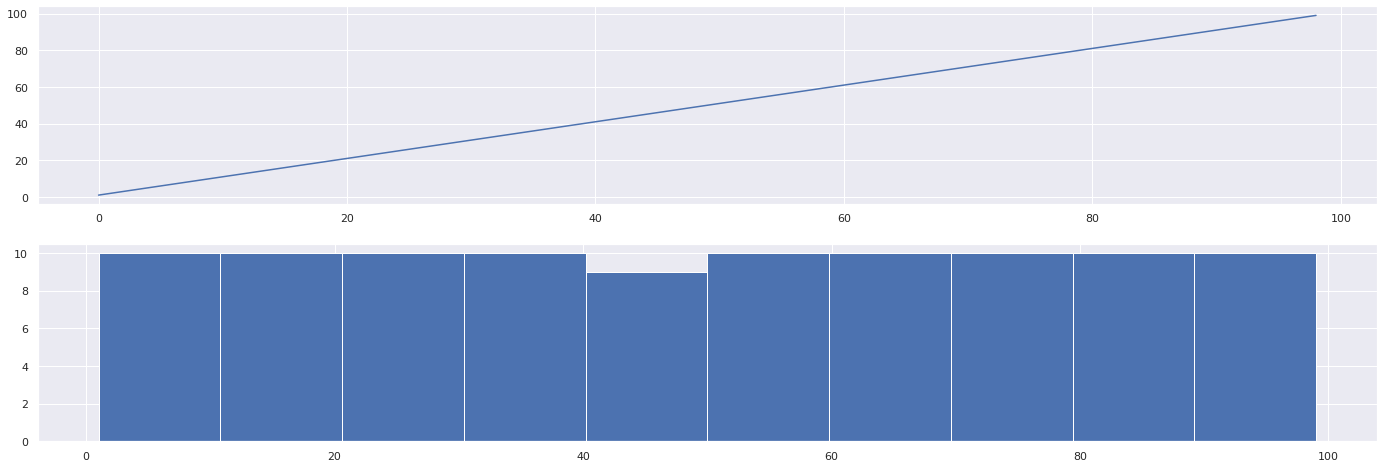

In [ ]:
# log transform a contrived exponential time series
from matplotlib import pyplot
from math import exp
from numpy import log
series = [exp(i) for i in range(1,100)]
transform = log(series)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(transform)

# histogram
pyplot.subplot(212)
pyplot.hist(transform)
pyplot.show()


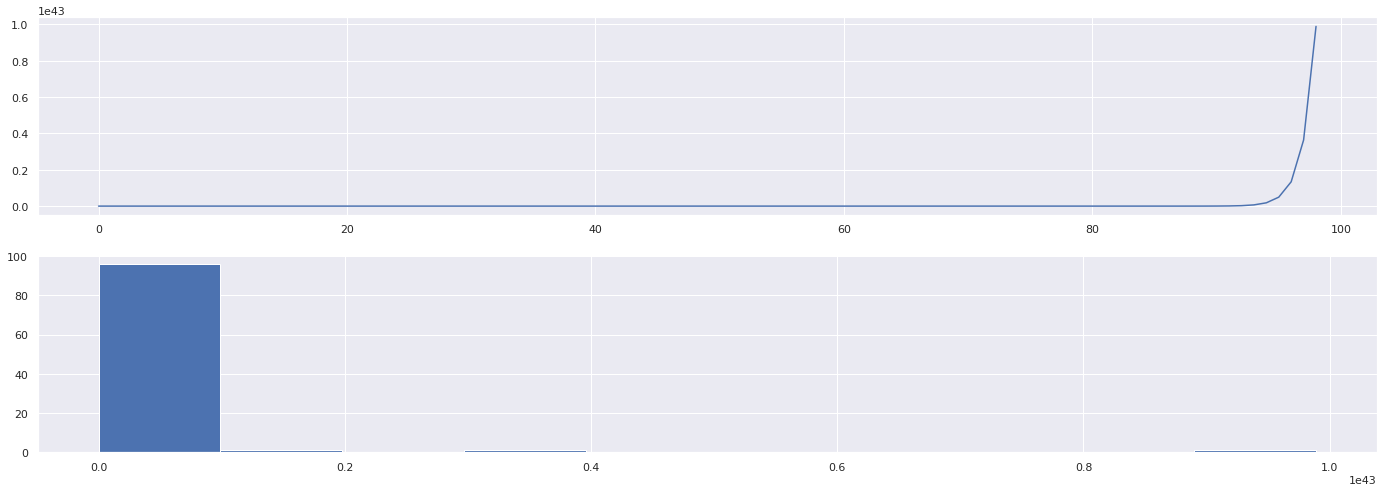

In [ ]:
# create and plot an exponential time series
from matplotlib import pyplot
from math import exp
series = [exp(i) for i in range(1,100)]
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(series)
# histogram
pyplot.subplot(212)
pyplot.hist(series)
pyplot.show()


# Moving Average and Smoothing


In [ ]:
df1 = train[(train['country']=='Belgium')&(train['product']=='Kaggle Advanced Techniques')&(train['store']=='KaggleMart')]
df1['value']=df['num_sold']
serie=df1["value"].squeeze()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0             NaN
48            NaN
96     575.333333
144    513.333333
192    491.000000
240    451.666667
288    441.666667
336    458.333333
384    434.333333
432    413.333333
Name: value, dtype: float64


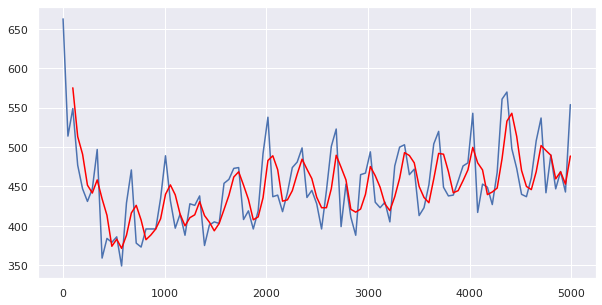

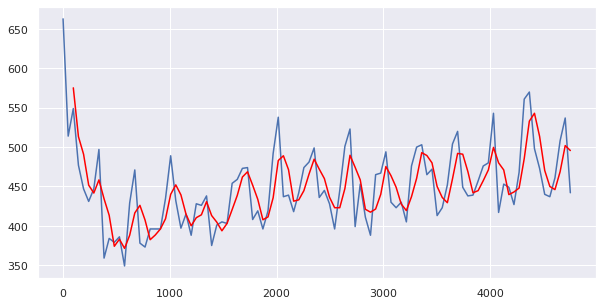

In [ ]:
# moving average smoothing as data preparation
from pandas import read_csv
from matplotlib import pyplot

# tail-rolling average transform
rolling = serie.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
# plot original and transformed dataset
serie.plot(figsize=(10,5))
rolling_mean.plot(color='red')
pyplot.show()
# zoomed plot original and transformed dataset
serie[:100].plot(figsize=(10,5))
rolling_mean[:100].plot(color='red')
pyplot.show()

In [ ]:
# moving average smoothing as feature engineering
from pandas import read_csv
from pandas import DataFrame
from pandas import concat

df = DataFrame(serie.values)
width = 3
lag1 = df.shift(1)
lag3 = df.shift(width - 1)
window = lag3.rolling(window=width)
means = window.mean()
dataframe = concat([means, lag1, df], axis=1)
dataframe.columns = ['mean', 't', 't+1']
print(dataframe.head(10))


         mean      t    t+1
0         NaN    NaN  663.0
1         NaN  663.0  514.0
2         NaN  514.0  549.0
3         NaN  549.0  477.0
4  575.333333  477.0  447.0
5  513.333333  447.0  431.0
6  491.000000  431.0  447.0
7  451.666667  447.0  497.0
8  441.666667  497.0  359.0
9  458.333333  359.0  384.0


In [ ]:
# moving average smoothing as a forecast model
from math import sqrt

from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

# prepare situation
X = serie.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
  length = len(history)
  yhat = mean([history[i] for i in range(length-window,length)])
  obs = test[t]
  predictions.append(yhat)
  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
# zoom plot
pyplot.plot(test[:100])
pyplot.plot(predictions[:100], color='red')
pyplot.show()


predicted=575.333333, expected=477.000000
predicted=513.333333, expected=447.000000
predicted=491.000000, expected=431.000000
predicted=451.666667, expected=447.000000
predicted=441.666667, expected=497.000000
predicted=458.333333, expected=359.000000
predicted=434.333333, expected=384.000000
predicted=413.333333, expected=379.000000
predicted=374.000000, expected=386.000000
predicted=383.000000, expected=349.000000
predicted=371.333333, expected=429.000000
predicted=388.000000, expected=471.000000
predicted=416.333333, expected=378.000000
predicted=426.000000, expected=373.000000
predicted=407.333333, expected=396.000000
predicted=382.333333, expected=396.000000
predicted=388.333333, expected=396.000000
predicted=396.000000, expected=435.000000
predicted=409.000000, expected=489.000000
predicted=440.000000, expected=432.000000
predicted=452.000000, expected=397.000000
predicted=439.333333, expected=415.000000
predicted=414.666667, expected=388.000000
predicted=400.000000, expected=428

ValueError: ignored